# Pitch range performance comparison

## Setup

In [1]:
import util.local_config as local_config
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from util.helper_functions.classification_report_output_processon import print_classification_report

In [2]:
# Get the ground truth labels
ground_truth_labels = local_config.GROUND_TRUTH_LABELS

# Get the speech and text model results dataframes
speech_model_results = local_config.SPEECH_MODEL_RESULTS
text_model_results = local_config.TEXT_MODEL_RESULTS

# Merge the ground truth labels with the speech model results
speech_model_results = pd.merge(speech_model_results, ground_truth_labels, on=['dialogue_id', 'utterance_id'])

# Merge the ground truth labels with the text model results
text_model_results = pd.merge(text_model_results, ground_truth_labels, on=['dialogue_id', 'utterance_id'])

In [3]:
# Bin the speech and text model results on pitch range
speech_model_results['pitch_range_bin'] = pd.cut(speech_model_results['pitch_range'], bins=local_config.SAMPLE_PITCH_RANGE_BINS)
text_model_results['pitch_range_bin'] = pd.cut(text_model_results['pitch_range'], bins=local_config.SAMPLE_PITCH_RANGE_BINS)

## Main

In [4]:
# For each bin, get the weighted f1-score for the speech and text model
speechmodel_f1_per_pitch_range = speech_model_results.groupby('pitch_range_bin').apply(lambda x: f1_score(x['ground_truth_emotion_one_hot_index'], x['model_prediction'], average='weighted')).reset_index()
text_model_f1_per_pitch_range = text_model_results.groupby('pitch_range_bin').apply(lambda x: f1_score(x['ground_truth_emotion_one_hot_index'], x['model_prediction'], average='weighted')).reset_index()

# Sort the speech and text model f1-scores by sample length bin
speechmodel_f1_per_pitch_range = speechmodel_f1_per_pitch_range.sort_values(by='pitch_range_bin')
text_model_f1_per_pitch_range = text_model_f1_per_pitch_range.sort_values(by='pitch_range_bin')

# Get the sample length bins as a list of label strings
pitch_range_bins = list(speechmodel_f1_per_pitch_range['pitch_range_bin'].astype(str))

# Get the speech and text model f1-scores as a list
speech_model_f1_scores_per_pitch_range_bin = list(speechmodel_f1_per_pitch_range[0])
text_model_f1_scores_per_pitch_range_bin = list(text_model_f1_per_pitch_range[0])

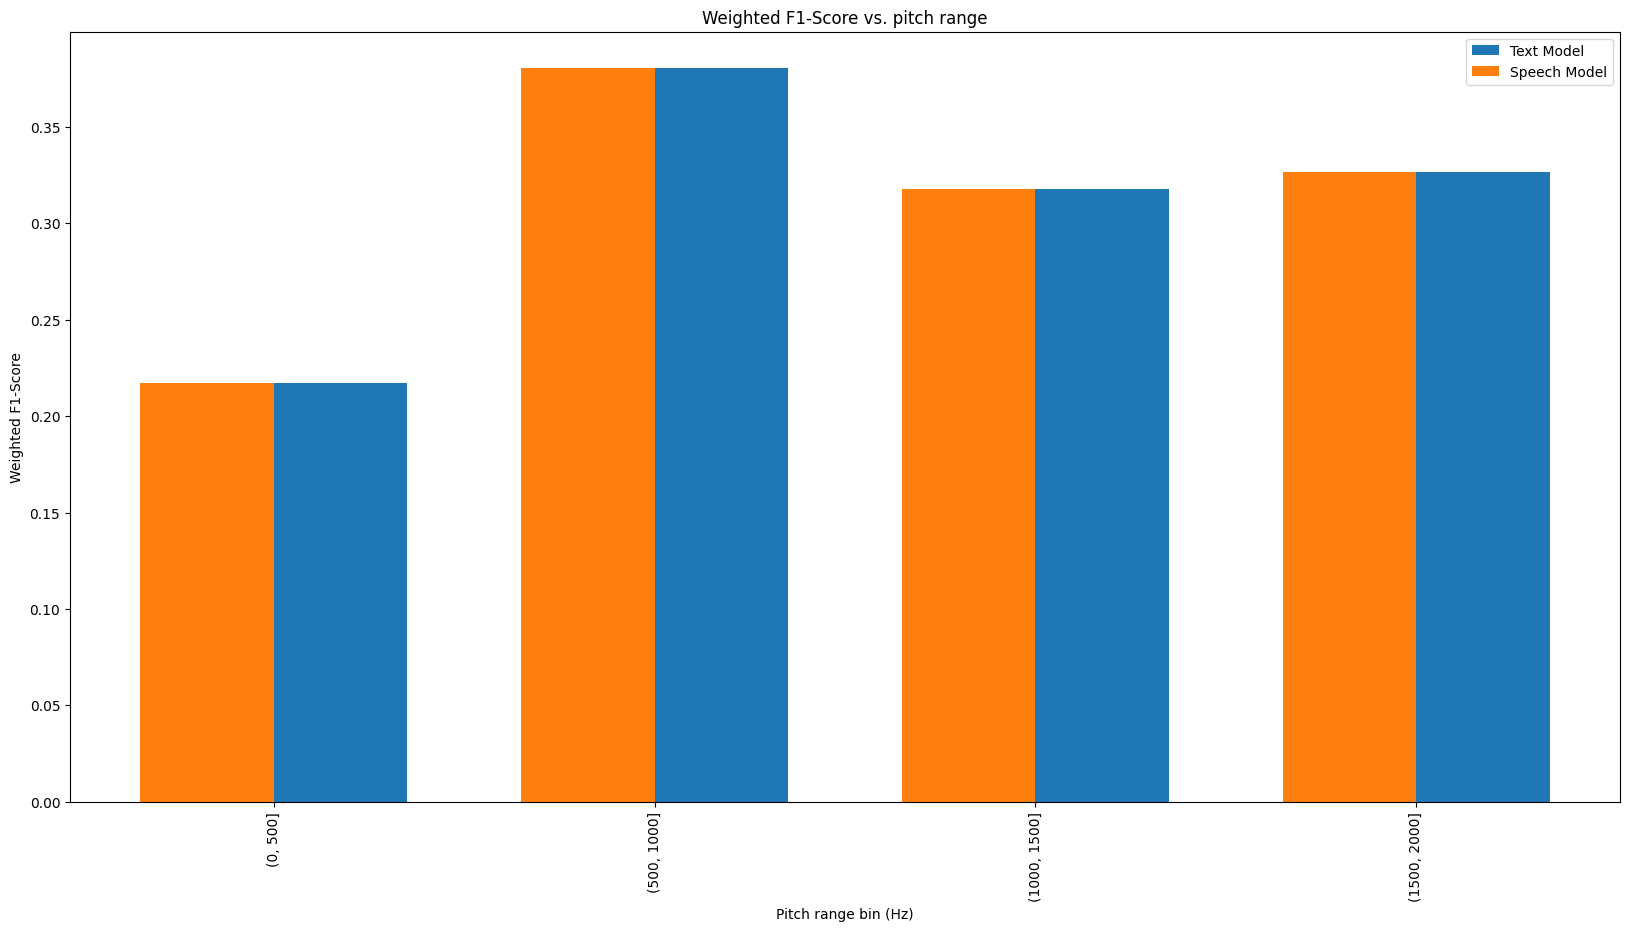

In [5]:
# Create a figure
plt.figure(figsize=(20, 10))

# Set the title
plt.title('Weighted F1-Score vs. pitch range')

# Set the bar parameters
index = np.arange(len(pitch_range_bins))
bar_width = 0.35

# Plot the speech and text model f1-scores vs. sample length
plt.bar(index+0.5*bar_width, text_model_f1_scores_per_pitch_range_bin, width=bar_width, label='Text Model')
plt.bar(index-0.5*bar_width, speech_model_f1_scores_per_pitch_range_bin, width=bar_width, label='Speech Model')

# Set the x and y label titles
plt.xlabel('Pitch range bin (Hz)')
plt.ylabel('Weighted F1-Score')

# Set the x tick labels
plt.xticks(index, pitch_range_bins)

# Angle the x tick labels
plt.xticks(rotation=90)

# Show the legend
plt.legend()

plt.show()